In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [174]:
# Отключение научной нотации
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [175]:
channel_messages = pd.read_csv('channel_messages.csv')
channel_messages.head()

,message_id,date,sender_id,reply_to,message,message_type,reactions
0,58966,2024-06-24 07:52:30,273111182,NaN,NaN,service,NaN
1,58963,2024-06-23 15:13:10,6303541799,NaN,NaN,service,NaN
2,58962,2024-06-23 09:09:22,877992803,NaN,NaN,service,NaN
3,58960,2024-06-22 22:24:01,78729430,NaN,NaN,service,NaN
4,58959,2024-06-22 17:30:12,210539493,NaN,NaN,service,NaN


In [176]:
# Оставим только сообщения пользователей
aimylogic_df = channel_messages[channel_messages['message_type'] != 'service'].copy()
aimylogic_df.head()

,message_id,date,sender_id,reply_to,message,message_type,reactions
5,58958,2024-06-22 17:05:48,675531076,NaN,для Aimylogic в одном экране можно разместить ...,text,NaN
6,58956,2024-06-22 08:02:22,166847792,NaN,т.е мне циклом надо запустить несколько раз стейт,text,NaN
7,58955,2024-06-22 08:02:06,166847792,NaN,подскажите из script: можно перейти в стейт?,text,NaN
10,58940,2024-06-21 06:35:21,793425185,58938,"Да, все сработало! Так и думал, что должно был...",text,🙏: 1
11,58939,2024-06-21 06:29:29,793425185,58938,Спасибо! Буду пробовать,text,NaN


In [177]:
aimylogic_df['date'] = pd.to_datetime(aimylogic_df['date'])

In [178]:
aimylogic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48880 entries, 5 to 54187
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    48880 non-null  int64         
 1   date          48880 non-null  datetime64[ns]
 2   sender_id     48839 non-null  float64       
 3   reply_to      20893 non-null  float64       
 4   message       47145 non-null  object        
 5   message_type  48880 non-null  object        
 6   reactions     1256 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [179]:
# Создаем столбец с комбинацией года и месяца
aimylogic_df['year_month'] = aimylogic_df['date'].dt.to_period('M')
# и с годом
aimylogic_df['year'] = aimylogic_df['date'].dt.year

# 1. Количество сообщений в месяц

Эта простая метрика может служить индикатором активности в сообществе. При условии, что всё общение в чате ведется исключительно в связи с функционированием конструктора чат-ботов Aimylogic (а это, вероятно, обеспечивается модераторами), увеличение количества сообщений в месяц может быть связано с ростом интереса к продукту и, как следствие, притоку новых клиентов и вопросов о его использовании. Также теоретически повышенная активность обсуждений может возникнуть вследствие изменений функционала, тогда даже у пользователей, которые хорошо знакомы с программой, может возникать потребность задать вопросы. 

Снижение же активности может косвенно отражать снижение интереса к продукту (но только как дополнительный признак совместно с метриками использования, которые измеряются для самого приложения), снижение эффективности чата (если пользователи не получают достаточно помощи в нем, они не будут возвращаться с вопросами) или могут свидетельствовать о том, что аудитория стала лучше понимать особенности работы с приложением (например, документация стала понятнее, само приложение стало интуитивно проще или история чата хорошо помогает отвечать на самые распространенные вопросы) и она меньше нуждается в их обсуждении.

In [180]:
# Считаем количество сообщений в месяц
monthly_messages = aimylogic_df.groupby('year_month').size()

In [181]:
# Сортируем данные по месяцам
monthly_messages = monthly_messages.sort_index()

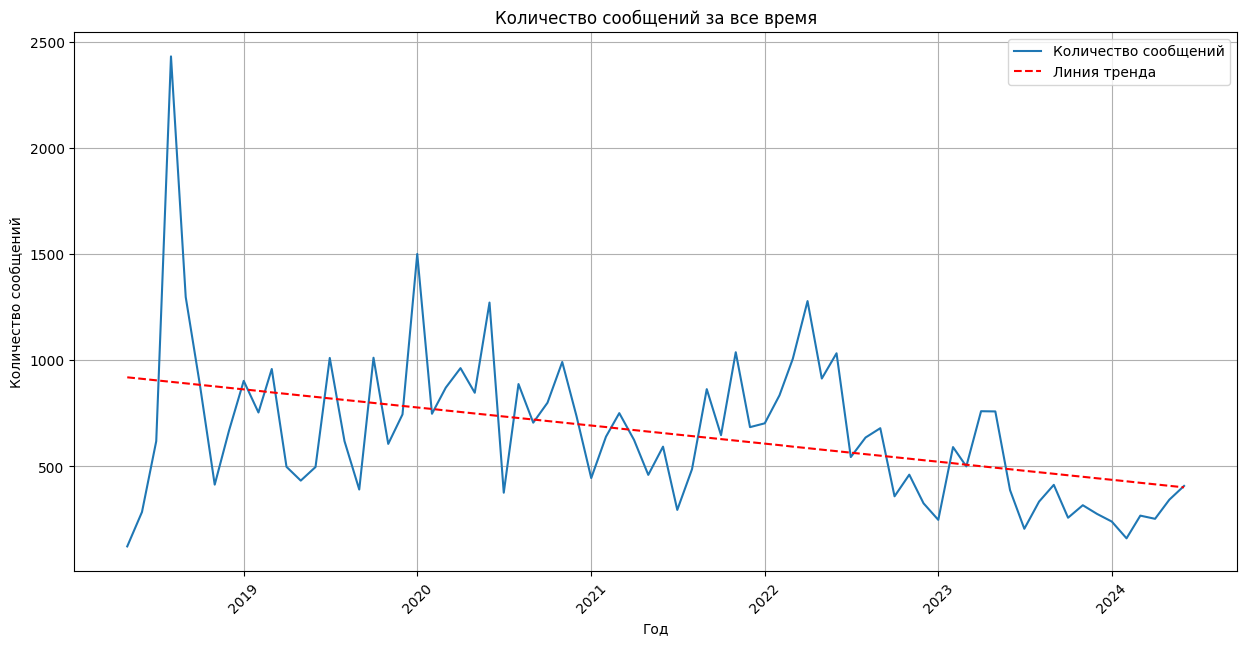

In [182]:
# Преобразуем индексы в числовой формат, чтобы построить линию тренда
x = np.arange(len(monthly_messages))
z = np.polyfit(x, monthly_messages.values, 1)
p = np.poly1d(z)

plt.figure(figsize=(15, 7))

# Линия количества сообщений по месяцам
plt.plot(monthly_messages.index.to_timestamp(), monthly_messages.values, label='Количество сообщений')

# Линия тренда
plt.plot(monthly_messages.index.to_timestamp(), p(x), "r--", label='Линия тренда')

# Настройка оси X для отображения годов
ticks = pd.date_range(start=monthly_messages.index.min().to_timestamp(), 
                      end=monthly_messages.index.max().to_timestamp(), 
                      freq='YS')
labels = ticks.strftime('%Y')
plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.title('Количество сообщений за все время')
plt.xlabel('Год')
plt.ylabel('Количество сообщений')
plt.grid(True)
plt.legend()
plt.show()

График показывает динамику изменения количества сообщений по месяцам с момента появления сообщества пользователей Aimylogic. Видно, что активность дискуссии то возрастает, то снижается, однако общий тренд скорее нисходящий. 

Сложно однозначно сказать, в чем причина, но среди возможных оснований могут быть уже упомянутые:
* снижение интереса к продукту в целом
* снижение эффективности чата
* повышение компетентности аудитории

Помимо этого следует отметить, что на графике виден очень сильный всплеск активности в самом начале существования чата, который, вероятно, был связан с интересом к появлению нового канала коммуникации. Ясно, что всплески подобного уровня впоследствии маловероятны, а значит, тренд на снижение неизбежен. Разумным было бы внимательнее изучить этот всплеск и, возможно, не учитывать его в будущих расчетах динамики активности чата при использовании данной метрики.

Впрочем, даже без него тренд оставался бы нисходящим, но, вероятно, был бы менее выражен.

# 2. Загруженность чата в течение недели

Данную метрику предлагается выразить через общее количество сообщений в определенные часы определенных дней недели. 

Такой показатель позволит определить те часы в течение недели, когда в чат приходило наибольшее количество сообщений, а значит, понять, когда нагрузка на сообщество самая интенсивная. Этот показатель может быть важен для планирования модерации сообщества. Очевидно, что в часы с наибольшей нагрузкой требуется большее количество и/или большая внимательность модераторов. 

Подсчет метрики осуществлялся с помощью группировки по дням недели и часам

In [183]:
# Создаем доп столбцы с данными о дне неделе и часе
aimylogic_df['day_of_week'] = aimylogic_df['date'].dt.dayofweek
aimylogic_df['hour'] = aimylogic_df['date'].dt.hour
aimylogic_df.head()

,message_id,date,sender_id,reply_to,message,message_type,reactions,year_month,year,day_of_week,hour
5,58958,2024-06-22 17:05:48,675531076,NaN,для Aimylogic в одном экране можно разместить ...,text,NaN,2024-06,2024,5,17
6,58956,2024-06-22 08:02:22,166847792,NaN,т.е мне циклом надо запустить несколько раз стейт,text,NaN,2024-06,2024,5,8
7,58955,2024-06-22 08:02:06,166847792,NaN,подскажите из script: можно перейти в стейт?,text,NaN,2024-06,2024,5,8
10,58940,2024-06-21 06:35:21,793425185,58938,"Да, все сработало! Так и думал, что должно был...",text,🙏: 1,2024-06,2024,4,6
11,58939,2024-06-21 06:29:29,793425185,58938,Спасибо! Буду пробовать,text,NaN,2024-06,2024,4,6


In [184]:
# Считаем количество сообщений по дням недели и часам
weekly_hourly_activity = aimylogic_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

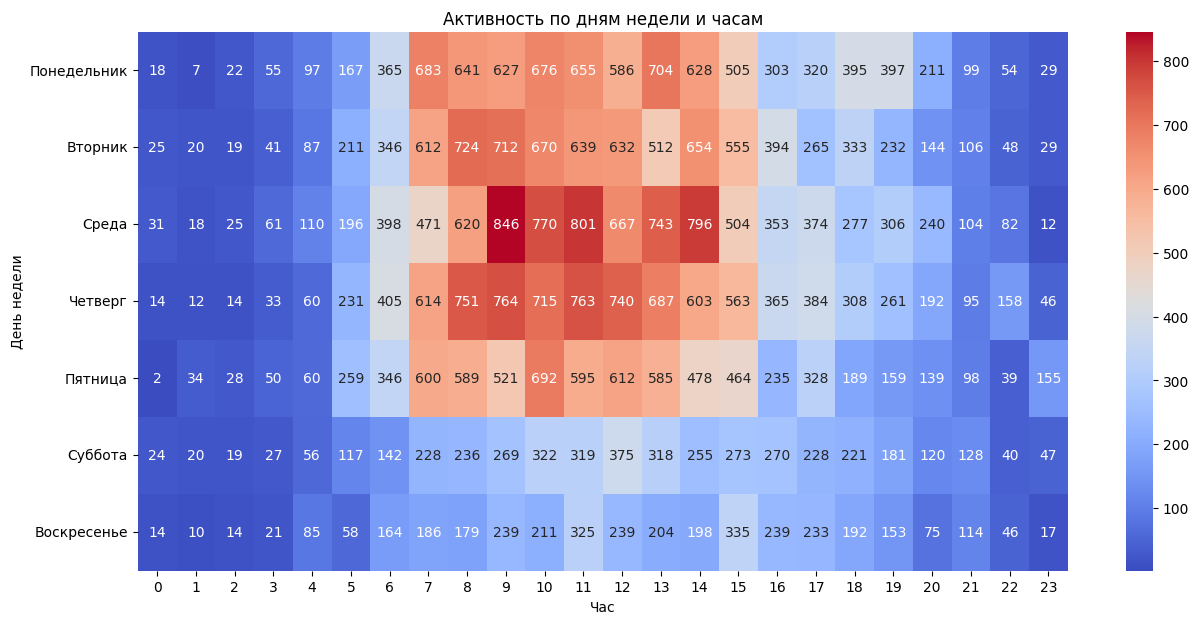

In [185]:
plt.figure(figsize=(15, 7))
sns.heatmap(weekly_hourly_activity, cmap="coolwarm", annot=True, fmt="d")
plt.title('Активность по дням недели и часам')
plt.xlabel('Час')
plt.ylabel('День недели')
plt.yticks(ticks=np.arange(7)+0.5, labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'], rotation=0)
plt.show()

Тепловая карта наглядно показывает, что наиболее загруженное время — это интервал примерно с 7 утра до 16 часов в будние дни, что, конечно, вполне ожидаемо. Пиковая нагрузка наблюдается в среду с 9 до 12 утра.

# 3. Топ постоянных пользователей

Поскольку анализируемый телеграм-чат позиционирует себя как сообщество пользователей, мне показалось интересным проверить, есть ли у этого сообщества некий постоянный костяк пользователей, те, кто находится в сообществе довольно долго и регулярно проявляет в нём активность.

Для измерения было посчитано количество сообщений каждого активного пользователя в месяц для каждого года. Если у пользователя в месяц есть хотя бы одно сообщение, этот месяц считался активным. Пользователи, у которых в году наибольшее количество активных месяцев в году, зачислялись в топ-10 самых стабильных пользователей этого года. Затем формировалась общая таблица за все годы, и из нее выделялись те, у кого было больше всего активных месяцев вообще за все время существования чата. 

Таким образом были сформированы список и тепловая карта топ-15 пользователей с наибольшим количеством активных месяцев.

In [186]:
# Считаем количество сообщений для каждого пользователя по месяцам
monthly_user_activity = aimylogic_df.groupby(['year_month', 'sender_id']).size().unstack(fill_value=0)

In [187]:
# Функция для определения топ-10 самых стабильных пользователей в заданном году
def get_top_stable_users(df, year):
    df_year = df[df['year'] == year]
    monthly_user_activity = df_year.groupby(['year_month', 'sender_id']).size().unstack(fill_value=0)
    active_months = (monthly_user_activity > 0).sum(axis=0)
    return active_months.nlargest(10).index

In [188]:
# Определяем топ-10 самых стабильных пользователей для каждого года
stable_users = set()
years = sorted(aimylogic_df['year'].unique())
top_users_by_year = {}

In [189]:
for year in years:
    top_users = get_top_stable_users(aimylogic_df, year)
    top_users_by_year[year] = set(top_users)
    # Проверка, есть ли стабильные пользователи из предыдущего года
    if stable_users:
        intersection = stable_users & set(top_users)
        if not intersection:
            top_users_by_year[year].update(stable_users)
    stable_users = top_users_by_year[year]

# Объединяем данные
all_top_users = set().union(*top_users_by_year.values())
monthly_user_activity = aimylogic_df.groupby(['year_month', 'sender_id']).size().unstack(fill_value=0)
monthly_activity_all_top_users = monthly_user_activity[list(all_top_users)].fillna(0)

In [190]:
# Транспонируем таблицу
monthly_activity_all_top_users_t = monthly_activity_all_top_users.T

In [191]:
# Считаем количества активных месяцев для каждого пользователя
active_months = (monthly_activity_all_top_users_t > 0).sum(axis=1)

# 15 самых стабильных пользователей
top_15_stable_users = active_months.nlargest(15).index
top_15_activity = monthly_activity_all_top_users_t.loc[top_15_stable_users]

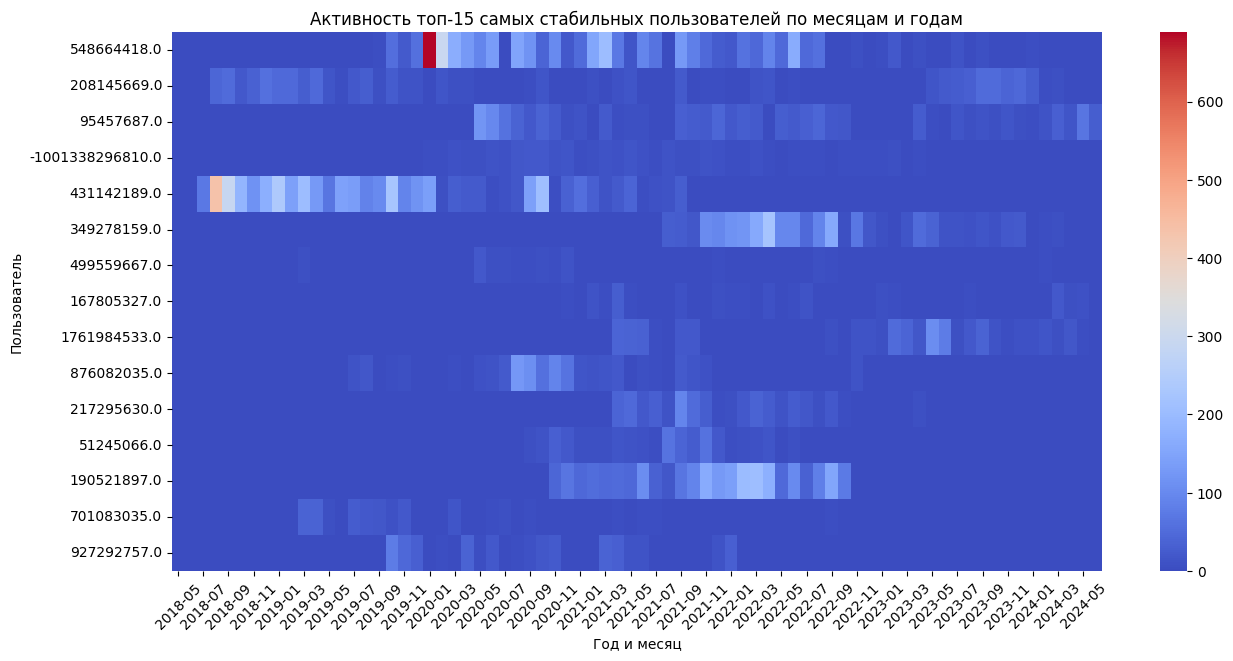

In [192]:
# Построение тепловой карты
plt.figure(figsize=(15, 7))
sns.heatmap(top_15_activity, cmap='coolwarm', cbar=True)
plt.title('Активность топ-15 самых стабильных пользователей по месяцам и годам')
plt.xlabel('Год и месяц')
plt.ylabel('Пользователь')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

На тепловой карте видны самые "стабильные" пользователи чата, которые сохраняли активность на протяжении наибольшего количества месяцев. Также видны периоды их наибольшей активности. 

Можно заметить, что динамика активности у разных подписчиков разнится: одни были активны "на заре" существования сообщества и потом из него практически пропали, другие стали активны не сразу (возможно, не сразу присоединились), зато сохраняют активность до сих пор. Есть также и те, кто относительно стабильно был активен как в первые месяцы функционирования канала, так и в 2024 году (при этом активность не обязательно была высокая, просто человек хотя бы раз в течение месяца писал в чат).

На основании этой карты можно говорить, что в чате присутствует определенный костяк пользователей, который регулярно проявляет активность, а значит, есть основания считать чат не просто ситуативным помощником в вопросах функционирования приложения, а вполне реальным сообществом.